In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('2018-2019.csv')

# Mostrar las primeras filas del dataset
print(df.head())

# Obtener información general sobre el dataframe
print(df.info())

# Resumen estadístico de las variables numéricas
print(df.describe())


  Div     Date      HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  E0  10/8/18    Man United       Leicester     2     1   H     1     0   H   
1  E0  11/8/18   Bournemouth         Cardiff     2     0   H     1     0   H   
2  E0  11/8/18        Fulham  Crystal Palace     0     2   A     0     1   A   
3  E0  11/8/18  Huddersfield         Chelsea     0     3   A     0     2   A   
4  E0  11/8/18     Newcastle       Tottenham     1     2   A     1     2   A   

   ... HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0  ...   6    4  11   8   2   5   2   1   0   0  
1  ...   4    1  11   9   7   4   1   1   0   0  
2  ...   6    9   9  11   5   5   1   2   0   0  
3  ...   1    4   9   8   2   5   2   1   0   0  
4  ...   2    5  11  12   3   5   2   2   0   0  

[5 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       

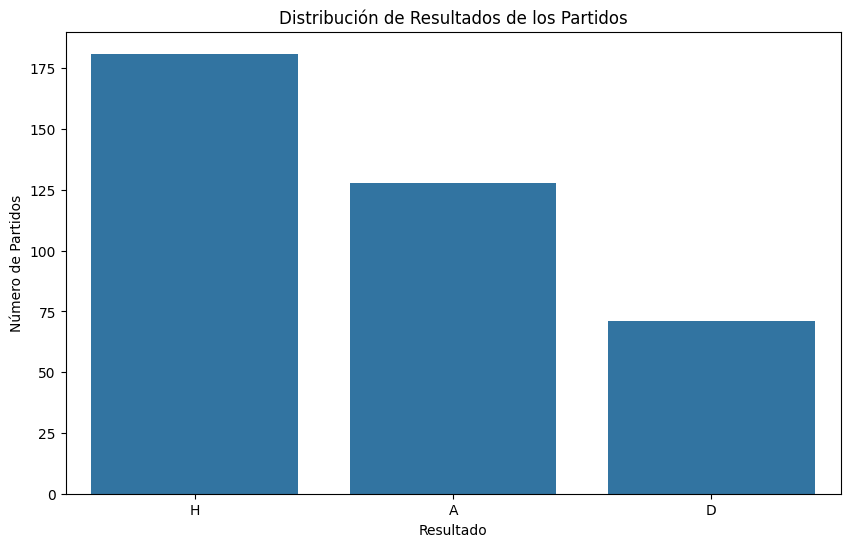

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de resultados
plt.figure(figsize=(10, 6))
sns.countplot(x='FTR', data=df)  # 'FTR' para el resultado completo del partido
plt.title('Distribución de Resultados de los Partidos')
plt.xlabel('Resultado')
plt.ylabel('Número de Partidos')
plt.show()


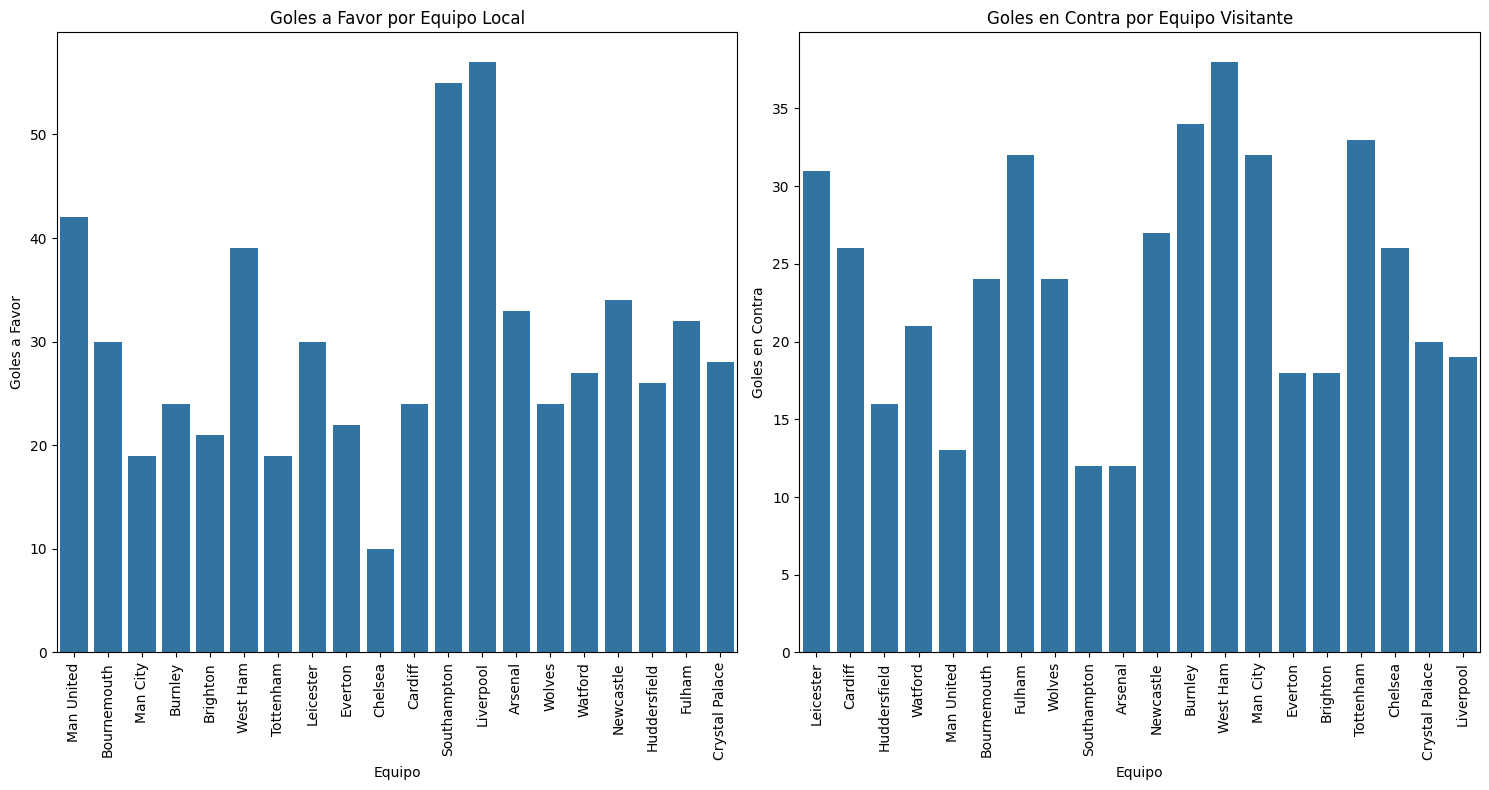

In [3]:
# Goles a favor y en contra
plt.figure(figsize=(15, 8))

# Goles a favor por equipo local
plt.subplot(1, 2, 1)
sns.barplot(x=df['HomeTeam'].value_counts().index, y=df.groupby('HomeTeam')['FTHG'].sum())
plt.xticks(rotation=90)
plt.title('Goles a Favor por Equipo Local')
plt.xlabel('Equipo')
plt.ylabel('Goles a Favor')

# Goles en contra por equipo visitante
plt.subplot(1, 2, 2)
sns.barplot(x=df['AwayTeam'].value_counts().index, y=df.groupby('AwayTeam')['FTAG'].sum())
plt.xticks(rotation=90)
plt.title('Goles en Contra por Equipo Visitante')
plt.xlabel('Equipo')
plt.ylabel('Goles en Contra')

plt.tight_layout()
plt.show()


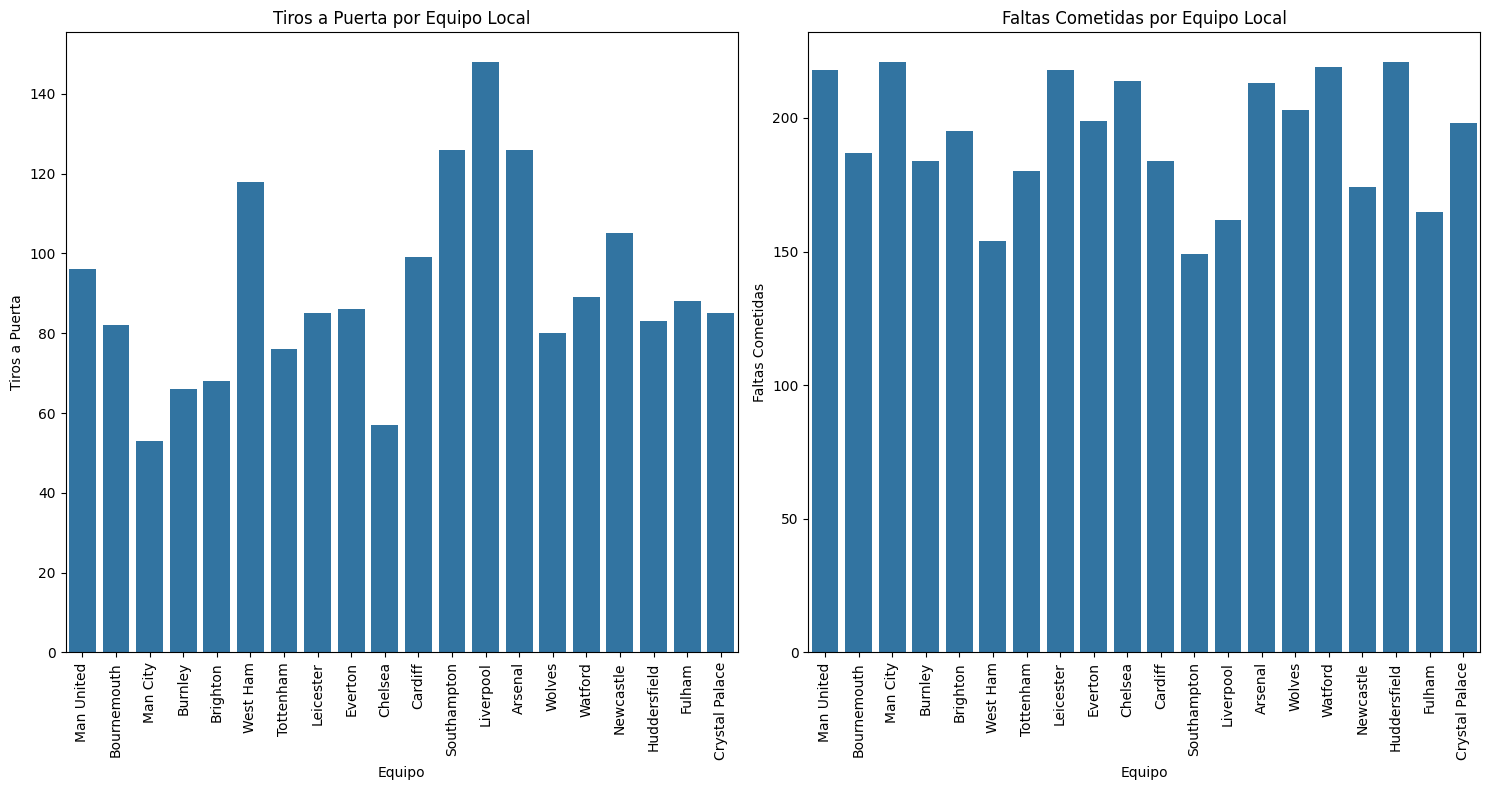

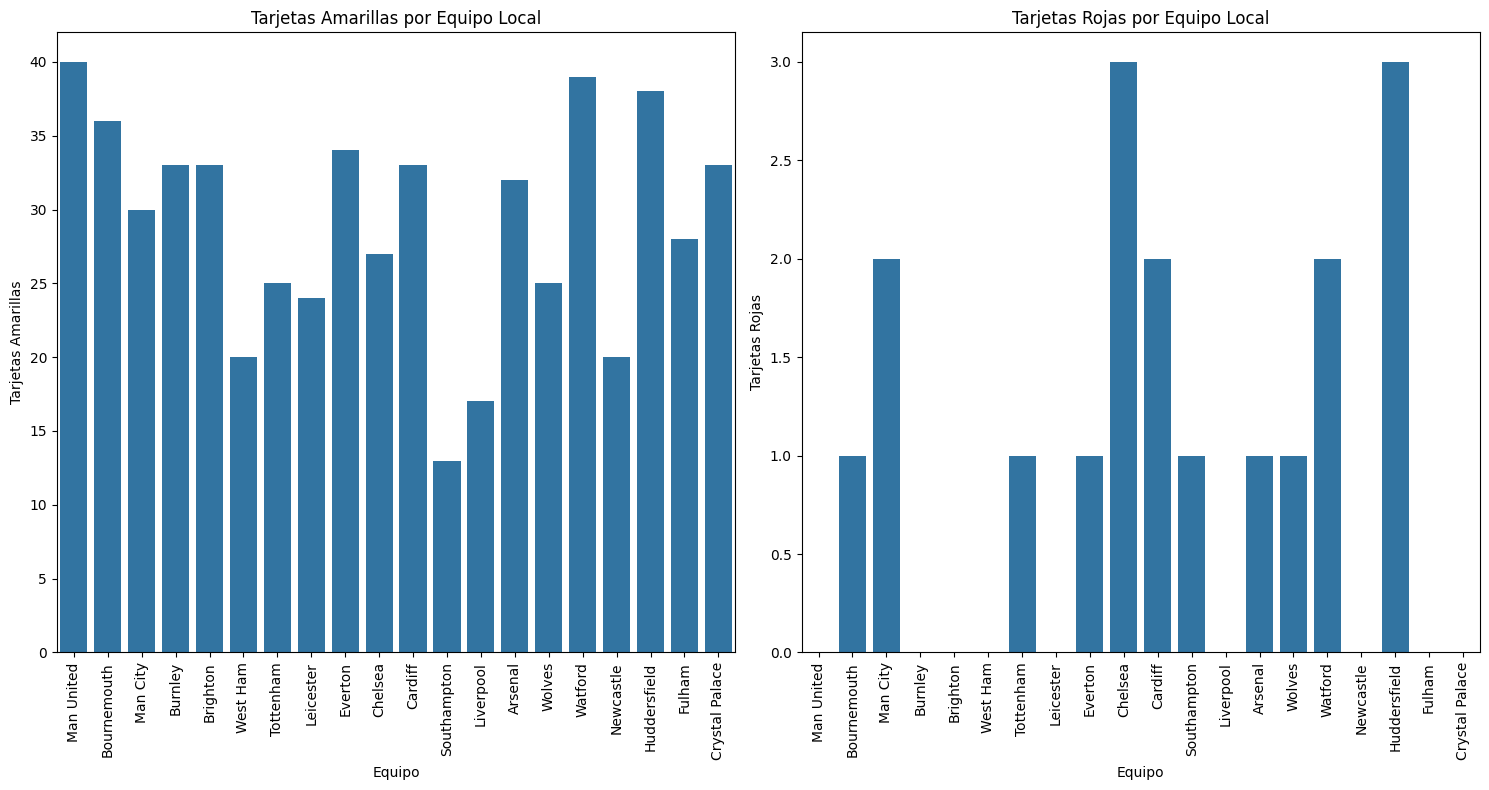

In [4]:
# Estadísticas de tiros
plt.figure(figsize=(15, 8))

# Tiros a puerta
plt.subplot(1, 2, 1)
sns.barplot(x=df['HomeTeam'].value_counts().index, y=df.groupby('HomeTeam')['HST'].sum())
plt.xticks(rotation=90)
plt.title('Tiros a Puerta por Equipo Local')
plt.xlabel('Equipo')
plt.ylabel('Tiros a Puerta')

# Faltas cometidas
plt.subplot(1, 2, 2)
sns.barplot(x=df['HomeTeam'].value_counts().index, y=df.groupby('HomeTeam')['HF'].sum())
plt.xticks(rotation=90)
plt.title('Faltas Cometidas por Equipo Local')
plt.xlabel('Equipo')
plt.ylabel('Faltas Cometidas')

plt.tight_layout()
plt.show()

# Tarjetas amarillas y rojas
plt.figure(figsize=(15, 8))

# Tarjetas amarillas
plt.subplot(1, 2, 1)
sns.barplot(x=df['HomeTeam'].value_counts().index, y=df.groupby('HomeTeam')['HY'].sum())
plt.xticks(rotation=90)
plt.title('Tarjetas Amarillas por Equipo Local')
plt.xlabel('Equipo')
plt.ylabel('Tarjetas Amarillas')

# Tarjetas rojas
plt.subplot(1, 2, 2)
sns.barplot(x=df['HomeTeam'].value_counts().index, y=df.groupby('HomeTeam')['HR'].sum())
plt.xticks(rotation=90)
plt.title('Tarjetas Rojas por Equipo Local')
plt.xlabel('Equipo')
plt.ylabel('Tarjetas Rojas')

plt.tight_layout()
plt.show()


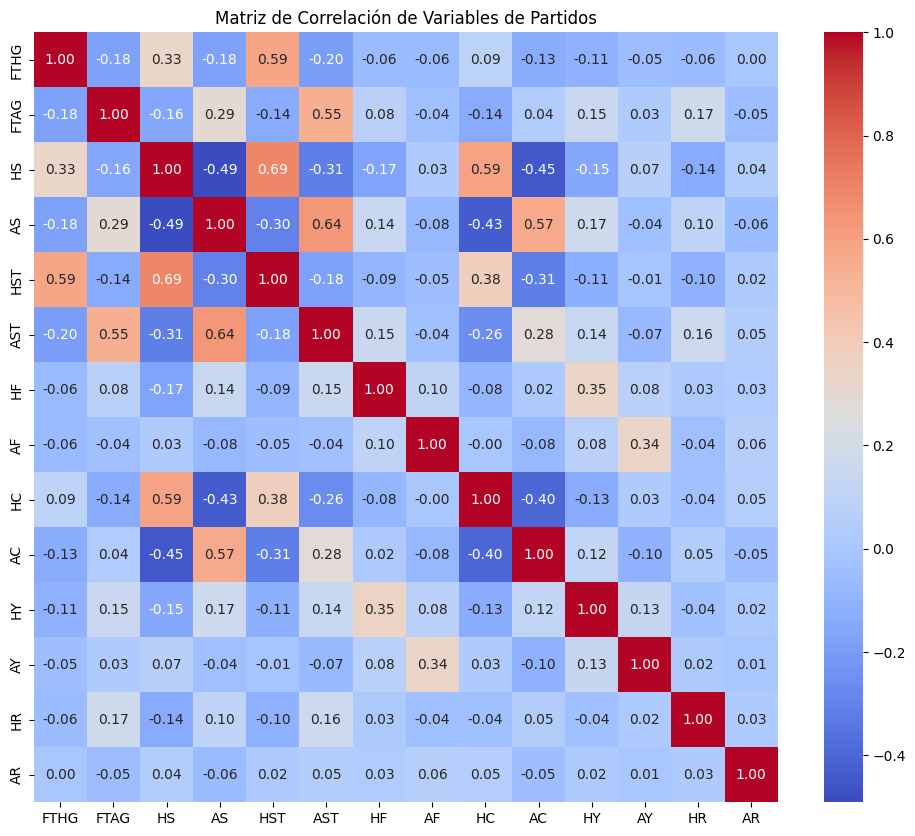

In [5]:
# Selección de variables numéricas
numeric_features = ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

# Calcular la correlación entre variables
corr_matrix = df[numeric_features].corr()

# Mapa de calor de la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables de Partidos')
plt.show()


C:\Users\Computer\AppData\Local\Temp\ipykernel_11076\1196235112.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


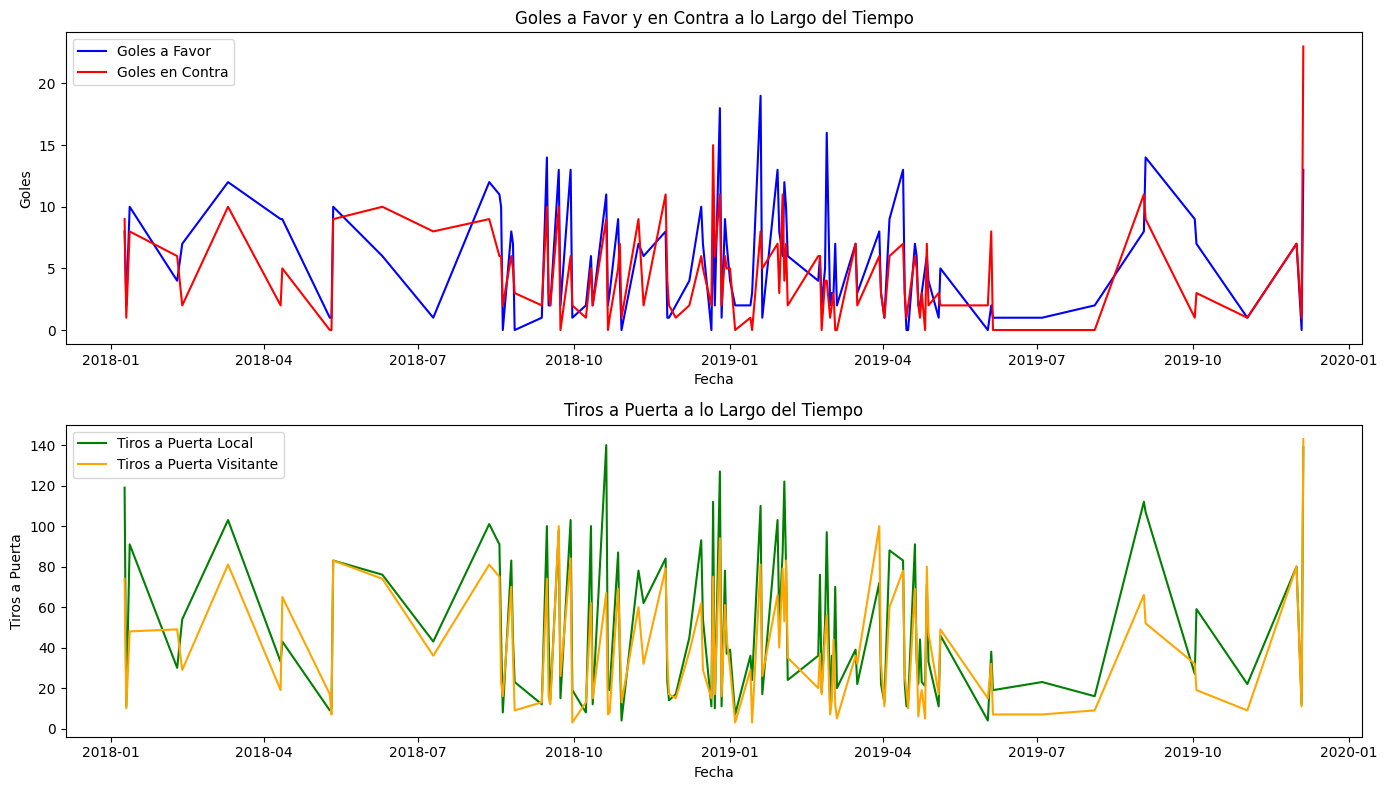

In [6]:
# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar por fecha y sumar estadísticas
df_time_series = df.groupby('Date').agg({
    'FTHG': 'sum',
    'FTAG': 'sum',
    'HS': 'sum',
    'AS': 'sum',
    'HF': 'sum',
    'AF': 'sum'
}).reset_index()

# Visualizar tendencias
plt.figure(figsize=(14, 8))

# Goles a favor y en contra a lo largo del tiempo
plt.subplot(2, 1, 1)
plt.plot(df_time_series['Date'], df_time_series['FTHG'], label='Goles a Favor', color='blue')
plt.plot(df_time_series['Date'], df_time_series['FTAG'], label='Goles en Contra', color='red')
plt.xlabel('Fecha')
plt.ylabel('Goles')
plt.title('Goles a Favor y en Contra a lo Largo del Tiempo')
plt.legend()

# Tiros a puerta y faltas a lo largo del tiempo
plt.subplot(2, 1, 2)
plt.plot(df_time_series['Date'], df_time_series['HS'], label='Tiros a Puerta Local', color='green')
plt.plot(df_time_series['Date'], df_time_series['AS'], label='Tiros a Puerta Visitante', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Tiros a Puerta')
plt.title('Tiros a Puerta a lo Largo del Tiempo')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Preparar los datos para el modelo
X = df[['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
y = df['FTR']  # Variable objetivo (resultado final)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Modelo: {accuracy}')


Precisión del Modelo: 1.0


c:\Users\Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Precisión Media de la Validación Cruzada: {scores.mean()}')


Precisión Media de la Validación Cruzada: 0.9947368421052631


c:\Users\Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# Generar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(cm)

# Informe de clasificación
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[27  0  0]
 [ 0 13  0]
 [ 0  0 36]]
Informe de Clasificación:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        27
           D       1.00      1.00      1.00        13
           H       1.00      1.00      1.00        36

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



In [11]:
from sklearn.model_selection import GridSearchCV

# Definir parámetros para la búsqueda en rejilla
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print(f'Mejores Parámetros: {grid_search.best_params_}')


c:\Users\Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

Mejores Parámetros: {'C': 10, 'solver': 'lbfgs'}


c:\Users\Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar un modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluar el modelo Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Precisión del Modelo Random Forest: {rf_accuracy}')


Precisión del Modelo Random Forest: 0.9473684210526315


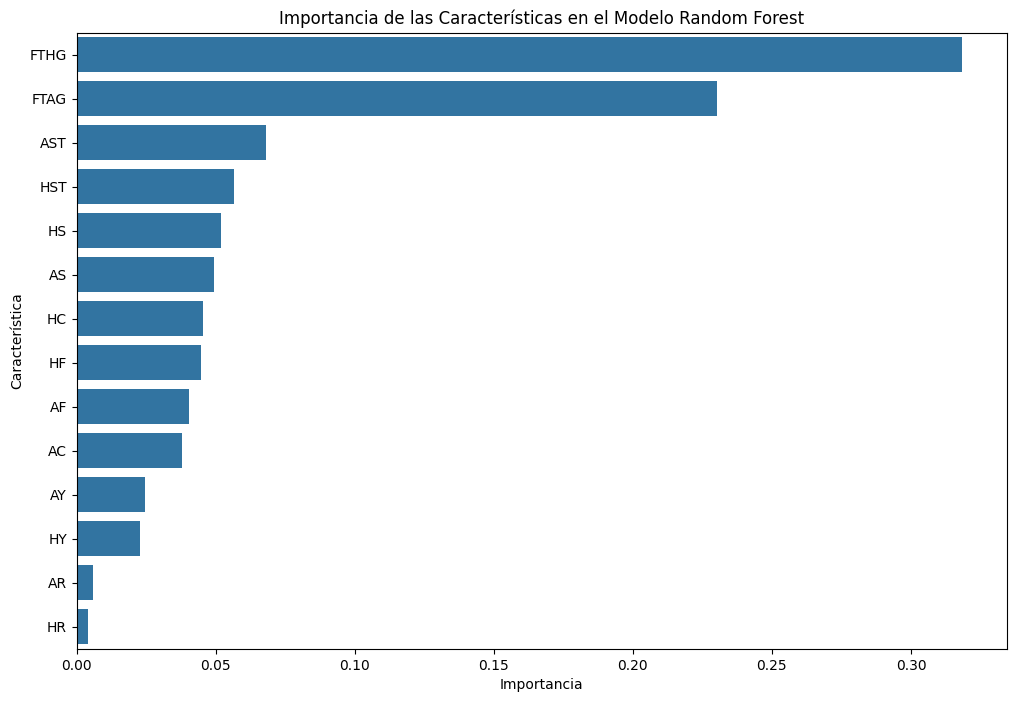

In [13]:
# Obtener importancia de características
importances = rf_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para visualizar la importancia
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()
